In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

from experimentcontroller import ExperimentController
from utilities import Utilities

In [2]:
# Set up logging
logger = logging.getLogger()
logger.setLevel(logging.WARN)

# Experiments
### Fixed $c$, increasing dimensions

In the following section I will test the algorithm's accuracy on matrices where the matching dimensions are increased, and everything else stays constant.
$$ $$
Random matrices with entries in $\[0,1\]$, sparse (density = 0.01) and dense
$ \delta = 0.05 \quad c = 50 \quad$ For dimensions 50 -> 1000 with increment of 50.

In [3]:
matrix_type_opts = ['dense', 'sparse']
prob_dist_type_opts = ['uniform', 'opt']
entries_type_opts = ['frac', 'int', 'float']


fix_delta = 0.05

exp_controller = ExperimentController()
exp_controller.normalize_error(False)
exp_controller.set_delta(fix_delta)
exp_controller.set_algorithm("emm")

In [8]:
# Use with BMM
dimensions = [] + list(range(50, 1001, 50))
fix_dim = 100
fix_c = 50

a_dims = np.column_stack((np.full(len(dimensions), fill_value=fix_dim), dimensions))
b_dims = np.column_stack((dimensions, np.full(len(dimensions), fill_value=fix_dim)))

# Use with EMM
b_dims = a_dims = np.array([[50 + i * 50, 50 + i * 50] for i in range(20)])

error_bound_lists = []

for matrix_type in matrix_type_opts:
    exp_controller.set_matrix_type(matrix_type)
    for prob_dist in prob_dist_type_opts:
        exp_controller.set_prob_dist_type(prob_dist)
        print(f"Calculating with options: {matrix_type}, {prob_dist}")
        error_bound_lists.append(exp_controller.changing_dim_const_c(
            a_dims=a_dims,
            b_dims=b_dims,
            c = fix_c
            )
        )

Calculating with options: dense, uniform
Calculating for A: (50 x 50)   B: (50 x 50)
Calculating for A: (100 x 100)   B: (100 x 100)
Calculating for A: (150 x 150)   B: (150 x 150)
Calculating for A: (200 x 200)   B: (200 x 200)
Calculating for A: (250 x 250)   B: (250 x 250)
Calculating for A: (300 x 300)   B: (300 x 300)
Calculating for A: (350 x 350)   B: (350 x 350)
Calculating for A: (400 x 400)   B: (400 x 400)
Calculating for A: (450 x 450)   B: (450 x 450)
Calculating for A: (500 x 500)   B: (500 x 500)
Calculating for A: (550 x 550)   B: (550 x 550)
Calculating for A: (600 x 600)   B: (600 x 600)
Calculating for A: (650 x 650)   B: (650 x 650)
Calculating for A: (700 x 700)   B: (700 x 700)
Calculating for A: (750 x 750)   B: (750 x 750)
Calculating for A: (800 x 800)   B: (800 x 800)
Calculating for A: (850 x 850)   B: (850 x 850)
Calculating for A: (900 x 900)   B: (900 x 900)
Calculating for A: (950 x 950)   B: (950 x 950)
Calculating for A: (1000 x 1000)   B: (1000 x 1000)

NameError: name 'error_bound_lists' is not defined

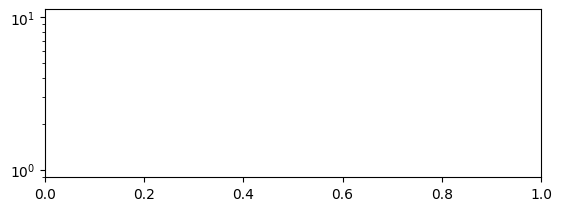

In [4]:
# Eliminate matplotlib log output
logger.setLevel(logging.WARN)

# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

color_map = ['b', 'r', 'g', 'y']
for index, (errors, bounds) in enumerate(error_bound_lists):
    if index in [0,1]:
        plt.errorbar(dimensions, errors, label=f"error_{Utilities.map_to_type(index)}", color=color_map[index])
        plt.errorbar(dimensions, bounds, label=f"bound_{Utilities.map_to_type(index)}", uplims=True, fmt='--', color=color_map[index])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)

### Fix 100x100 dimension, but c is increased

In [5]:
# Only for BMM
exp_controller.set_algorithm("bmm")
c_vals = np.array([] + list(range(5, 101, 5)))
shape_a = (100, 100)
shape_b = (100, 100)

error_bound_lists = []

for matrix_type in matrix_type_opts:
    exp_controller.set_matrix_type(matrix_type)
    for prob_dist in prob_dist_type_opts:
        exp_controller.set_prob_dist_type(prob_dist)
        print(f"Calculating with options: {matrix_type}, {prob_dist}")
        error_bound_lists.append(exp_controller.const_dim_changing_c(
            shape_a=shape_a, 
            shape_b=shape_b,
            list_c=c_vals
            )
        )

Calculating with options: dense, uniform
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...
Calculating for c = 70...
Calculating for c = 75...
Calculating for c = 80...
Calculating for c = 85...
Calculating for c = 90...
Calculating for c = 95...
Calculating for c = 100...
Calculating with options: dense, opt
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...
Calculating for c = 70...
Calculating for c = 75...
Calculating f

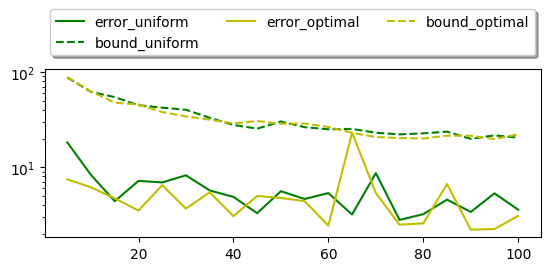

In [7]:
# Eliminate matplotlib log output
logger.setLevel(logging.WARN)

# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

color_map = ['b', 'r', 'g', 'y']
for index, (errors, bounds) in enumerate(error_bound_lists):
    if index in [2,3]:
        plt.errorbar(c_vals, errors, label=f"error_{Utilities.map_to_type(index)}", color=color_map[index])
        plt.errorbar(c_vals, bounds, label=f"bound_{Utilities.map_to_type(index)}", uplims=True, fmt='--', color=color_map[index])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)

## Trying Element-wise Matrix Multiplication

Here I only tested square matrices, since only those are bounded in the paper

In [ ]:
exp_controller.set_algorithm("emm")